<a href="https://colab.research.google.com/github/JuhiRaj/3DSimulations/blob/main/SPV_2DSimulation_SingleGaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This part generates the PSF kernels based on the Table in the Report - Resolution Modeling for Spatially Variant Images

Mounted at /content/gdrive


<ipython-input-1-c1287e760c62>:56: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  profile = profile_line(kernel, start, end, linewidth=2) #Take the profile line
<ipython-input-1-c1287e760c62>:56: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  profile = profile_line(kernel, start, end, linewidth=2) #Take the profile line
<ipython-input-1-c1287e760c62>:56: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.19 it will be set to 'reflect'. To avoid this warning, set `mode=` explicitly.
  profile = profile_line(kernel, start, end, linewidth=2) #Take the profile line
<ipython-input-1-c1287e760c62>:56: FutureWarning: Default out of bounds interpolation mode 'constant' is deprecated. In version 0.

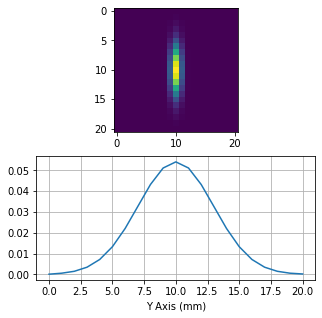

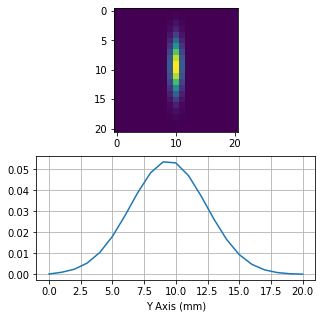

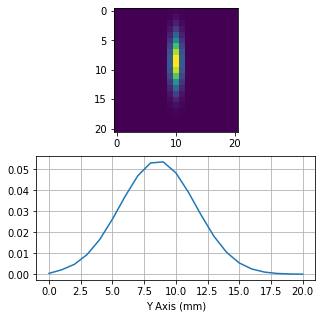

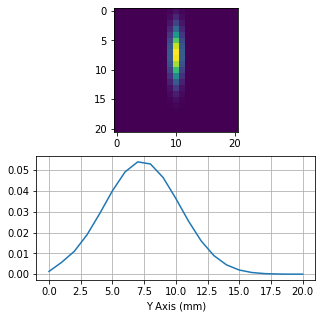

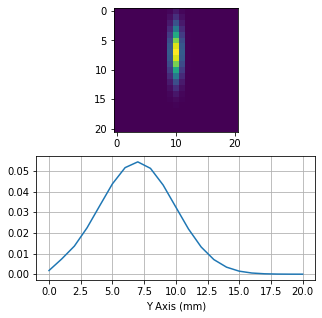

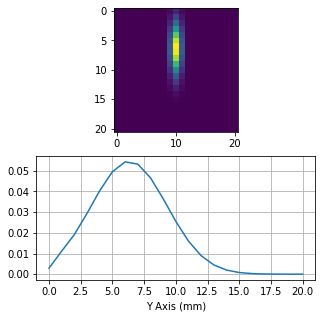

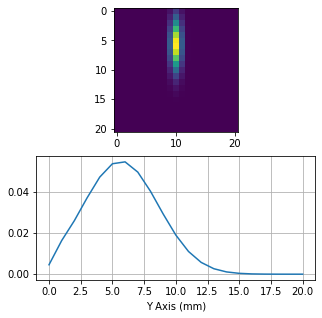

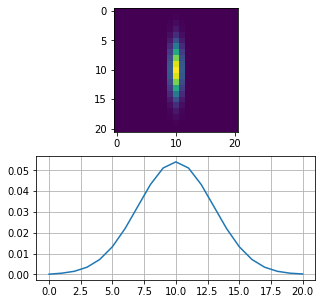

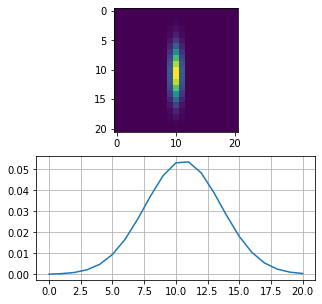

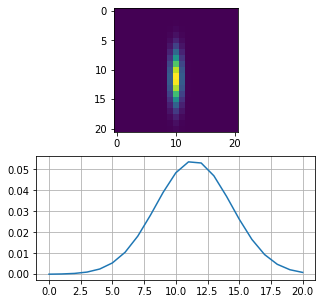

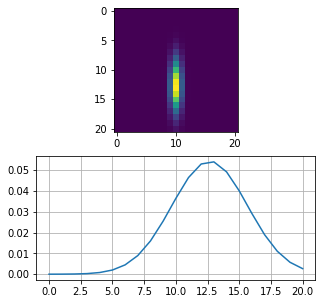

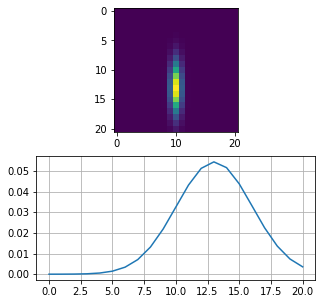

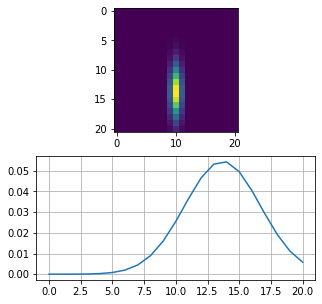

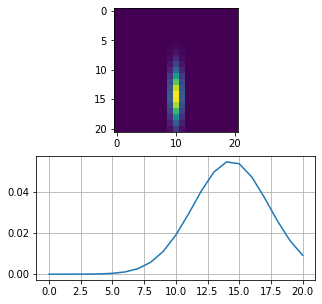

In [ ]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gc
import math
import cv2
from scipy import integrate
import shutil
from google.colab import drive
drive.mount('/content/gdrive')
from numpy import pi, exp, sqrt
import matplotlib.pylab as plt
from matplotlib import pyplot as plt
from skimage.measure import profile_line
from skimage.io import imread
path_kernel = "/content/gdrive/MyDrive/Figures/Symmetric/"
if not os.path.exists(path_kernel):
    os.makedirs(path_kernel)
else:
    shutil.rmtree(path_kernel)           
    os.makedirs(path_kernel)


list_sigma1 = [7.03, 7.03, 7.03, 7.03, 7.03, 7.03, 7.03] #Sigma 1 List
list_shift_1 = [0., -0.58, -1.41, -2.67, -3.03, -3.68, -4.35]    #Shift 1 List
#list_sigma2 = [7.03, 7.03, 7.03, 7.038, 7.03, 7.03, 7.03] #Sigma 2 List
#list_shift_2 = [0., 0.69, 1.62, 2.69, 3.61, 4.08, 4.49] #Shift 2 List
#ratio = [0.0222, 0.079, 0.2349, 0.4403, 0.6594, 0.6731, 0.6694] #Ratio

list_kernels1 = []
list_kernels2 = []

for i in range(7):
  tof1, shift1, lor1, k = list_sigma1[i]/2.355, list_shift_1[i], 1.5/2.355, 10
  probs1 = [exp((-((z-shift1)**2))/(2*tof1*tof1))/sqrt(2*pi*tof1*tof1) for z in range(-k,k+1)] 
  probs2 = [exp(-z*z/(2*lor1*lor1))/sqrt(2*pi*lor1*lor1) for z in range(-k,k+1)] 
  kernel1 = np.outer(probs1, probs2)
  #Check if the integral is 1 (To check the scale)

  #tof2, shift2, lor2, k = list_sigma2[i]/2.355, list_shift_2[i], 1.5/2.355, 10
  #probs3 = [exp((-((z-shift2)**2))/(2*tof2*tof2))/sqrt(2*pi*tof2*tof2) for z in range(-k,k+1)] 
  #probs4 = [exp(-z*z/(2*lor2*lor2))/sqrt(2*pi*lor2*lor2) for z in range(-k,k+1)] 
  #kernel2 = np.outer(probs3, probs4)

  #kernel = (ratio[i]*kernel1) +  ((1-ratio[i])*kernel2)
  kernel = kernel1
  kernel = kernel/np.sum(kernel) #making the integral 1
  flat_ker1 = kernel.flatten()
  list_kernels1.append(flat_ker1)
  start = (0, 10) #Start of the profile line
  end = (20, 10) #End of the profile line
  profile = profile_line(kernel, start, end, linewidth=2) #Take the profile line
  fig, ax = plt.subplots(2, 1, figsize=(5, 5)) #Create the figures
  ax[0].imshow(kernel) #Show the film at the top
  ax[1].plot(profile)
  ax[1].grid()
  ax[1].set_xlabel('Y Axis (mm)')
  plt.savefig(path_kernel + str(i)+'.png')

#check = list_kernels1[6].reshape(21,21) # This is how you read the kernels later
#plt.imshow(check)

for i in range(7):
  tof1, shift1, lor1, k = list_sigma1[i]/2.355, list_shift_1[i], 1.5/2.355, 10
  probs1 = [exp((-((z+shift1)**2))/(2*tof1*tof1))/sqrt(2*pi*tof1*tof1) for z in range(-k,k+1)] 
  probs2 = [exp(-z*z/(2*lor1*lor1))/sqrt(2*pi*lor1*lor1) for z in range(-k,k+1)] 
  kernel1 = np.outer(probs1, probs2)
  #Check if the integral is 1 (To check the scale)

  #tof2, shift2, lor2, k = list_sigma2[i]/2.355, list_shift_2[i], 1.5/2.355, 10
  #probs3 = [exp((-((z+shift2)**2))/(2*tof2*tof2))/sqrt(2*pi*tof2*tof2) for z in range(-k,k+1)] 
  #probs4 = [exp(-z*z/(2*lor2*lor2))/sqrt(2*pi*lor2*lor2) for z in range(-k,k+1)] 
  #kernel2 = np.outer(probs3, probs4)

  #kernel = (ratio[i]*kernel1) +  ((1-ratio[i])*kernel2)
  kernel = kernel1
  kernel = kernel/np.sum(kernel) #making the integral 1
  flat_ker2 = kernel.flatten()
  list_kernels2.append(flat_ker2)  
  start = (0, 10) #Start of the profile line
  end = (20, 10) #End of the profile line
  profile = profile_line(kernel, start, end, linewidth=2) #Take the profile line
  fig, ax = plt.subplots(2, 1, figsize=(5, 5)) #Create the figures
  ax[0].imshow(kernel) #Show the film at the top
  ax[1].plot(profile)
  ax[1].grid()

This part of the code generates the label point sources randomly in the image space.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
--------label----------
532.0
--------image----------
531.840588764601


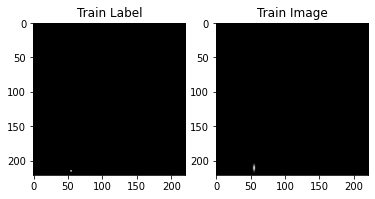

--------label----------
234.0
--------image----------
233.99999999999994


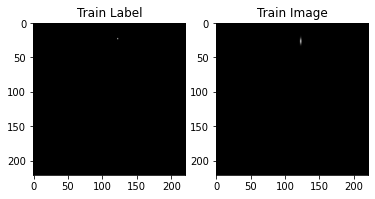

--------label----------
342.0
--------image----------
341.9999999999999


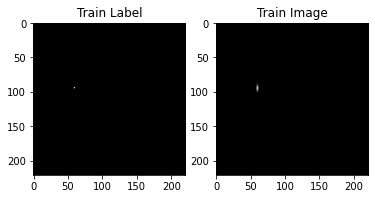

--------label----------
364.0
--------image----------
357.49584591671584


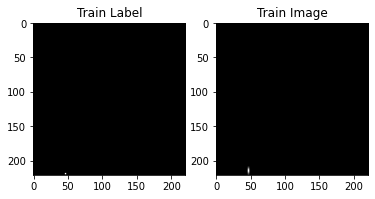

--------label----------
236.0
--------image----------
235.99999999999687


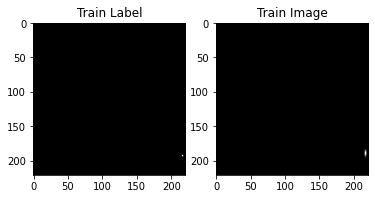

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from scipy import signal
import torch
import torch.nn as nn
from PIL import Image
import gc
import math
import cv2
from scipy import integrate
import shutil
from matplotlib import cm
from google.colab import drive
drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/PointSource_Test/"

if not os.path.exists(path):
    os.makedirs(path)
else:
    shutil.rmtree(path)           
    os.makedirs(path)
os.mkdir(path + 'label/')
os.mkdir(path + 'image/')

path_label = "/content/gdrive/MyDrive/PointSource_Test/label/"
path_image = "/content/gdrive/MyDrive/PointSource_Test/image/"



for N in range(5):    #Set N for the number of training images you want to generate.
  rand_l = 1
  #print(rand_l)
  x = y = np.linspace(-110.5, 110.5, 221)
  xv, yv = np.meshgrid(x, y)
  f = 0.
  f_blur = 0.

  for i in range(rand_l):
    randx = random.randint(-110, 110)
    randy = random.randint(-110, 110)
    #radius = random.uniform(1, 30)
    radius = 1
    level = np.random.randint(50, 150)
    f_check = ((xv+randx)**2 + (yv+randy)**2 < radius).astype(np.int16)
    f = f + (level*f_check)
    f_check_blur = 0.
    #Position based convolution of the kernels with the point source. (Lower half of the Image)
    if randy in range(-111, -95):
      kernel_toconv = list_kernels1[6].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-95, -79):
      kernel_toconv = list_kernels1[5].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-79, -63):
      kernel_toconv = list_kernels1[4].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-63, -47):
      kernel_toconv = list_kernels1[3].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-47, -31):
      kernel_toconv = list_kernels1[2].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-31, -15):
      kernel_toconv = list_kernels1[1].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(-15, 0):
      kernel_toconv = list_kernels1[0].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
#Position based convolution of the kernels with the point source. (Upper half of the Image)
    elif randy in range(0, 15):
      kernel_toconv = list_kernels2[0].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(15, 31):
      kernel_toconv = list_kernels2[1].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(31, 47):
      kernel_toconv = list_kernels2[2].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(47, 63):
      kernel_toconv = list_kernels2[3].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(63, 79):
      kernel_toconv = list_kernels2[4].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(79, 95):
      kernel_toconv = list_kernels2[5].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    elif randy in range(95, 111):
      kernel_toconv = list_kernels2[6].reshape(21,21) 
      f_check_blur = signal.fftconvolve(f, kernel_toconv, mode = 'same')
    f_blur = f_blur + f_check_blur
  
  print("--------label----------")
  print(np.sum(f))
  print("--------image----------")
  print(np.sum(f_blur))
  plt.figure(figsize=(6,4))
  plt.subplot(121)
  plt.imshow(f, cmap='gray')
  plt.title('Train Label')
  plt.subplot(122)
  plt.imshow(f_blur, cmap='gray')
  plt.title('Train Image')
  plt.show()


#  start = (0, 110) #Start of the profile line
#  end = (220, 110) #End of the profile line
#  profile1 = profile_line(f, start, end, linewidth=2) #Take the profile line
#  fig, ax = plt.subplots(2, 1, figsize=(5, 5)) #Create the figures
#  ax[0].imshow(f) #Show the film at the top
#  ax[1].plot(profile1)
#  ax[1].grid()

 # start = (0, 110) #Start of the profile line
 # end = (220, 110) #End of the profile line
 # profile2 = profile_line(f_blur, start, end, linewidth=2) #Take the profile line
 # fig, ax = plt.subplots(2, 1, figsize=(5, 5)) #Create the figures
 # ax[0].imshow(f_blur) #Show the film at the top
 # ax[1].plot(profile2)
 # ax[1].grid()

  plt.imsave(path_label + str(N)+'.png', f, cmap = cm.gray)
  plt.imsave(path_image + str(N)+'.png', f_blur, cmap = cm.gray)
  #label = Image.fromarray(f)
  #label.save('check', "PNG", optimize=True)  #Image.fromarray(f).save('/content/gdrive/MyDrive/check/image/0.png')
  #f.tofile("/content/gdrive/MyDrive/check/label/%d.i", N)
  #f_blur.tofile("/content/gdrive/MyDrive/check/label/%d.i", N)
  #cv2.imwrite(', f_blur)
  #cv2.imwrite('/content/gdrive/MyDrive/check/label/0.png', f)
